<h1><center>Reconstructing HPGe Detector Waveform Energy</center></h1>

This notebook will guide you through problems 6 of HW4. Start out by reading the problem descriptions in the main homework assignment before you work through this notebook.

We have three imports for this assignment. Please do not import any other packages.

In [23]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

In [24]:
waveforms = pd.read_csv('HPGeData.csv')


<h2> Problem 6: Prediction Competition<h2>

Your task is to modify the `predict` function given below, according to the rules given in the main homework assignment. Remember you can use up to three variables, and your design matrix can have up to five columns. We recommend determining your best prediction rule before implementing the `predict` function. 


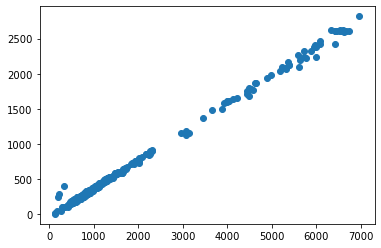

In [25]:
# Use this cell (and add more as needed) to determine your best prediction rule. 
# Then implement the predict function below.
energy = waveforms["Energy"]
max_amp = waveforms["Max_Amp"]

# showing positive correlation between max_amp and energy
plt.scatter(max_amp, energy);

In [26]:
def predict(row):
    '''Function that returns the predicted energy for a given row of the waveform features
    row will be a 1-d array of [Max_Amp, tDrift50, tDrift90, tDrift100, blnoise, tslope]
    please change the return 0 to return predicted energy given these parameters
    '''
    # taking x and y data to find w*
    xs = np.array(waveforms["Max_Amp"])
    ys = np.array(waveforms["Energy"])
    
    # finding the optimal w*
    w = np.polyfit(xs, ys, 1)
    
    # finding the prediction vector
    h = w[1] + w[0] * row[0]
    
    # returning prediction vector
    return h

Don't modify the `calculate_MSE` function given below. This tests how well your predictions perform on a given dataset.

In [27]:
def calculate_MSE(df):
    '''Compute MSE of the predictions corresponding to each row of the given dataframe'''
    n = df.shape[0]
    total_squared_error = 0
    for i in np.arange(n):
        predicted = predict(df.iloc[i].drop("Energy"))
        actual = df.iloc[i].get('Energy')
        squared_error = (actual - predicted)**2
        total_squared_error += squared_error
    return total_squared_error/n

You can test out your predictions on the training dataset provided. We'll also test your predictions on a hidden test dataset.

In [28]:
# An example prediction
example_row = waveforms.iloc[0].drop("Energy")
predict(example_row)

459.6258874785008

In [29]:
print(calculate_MSE(waveforms))

990.345917690775


<h3> To Submit </h3>

In the top left corner, in the File menu, select Download as Python (.py). 

You must save your file as `hw4code.py` for the Gradescope autograder to run. Then, upload this file to the assignment called Homework 4 Code on Gradescope. Problems 4b, 4c, and 5 will be autograded, so you don't need to turn in any written explanation for these questions.